# Parâmetros iniciais e paths.

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Dados
width = 300
height = 150
MD = width * height
new_size = (width, height)

img1 = 'img/arcanine.jpg'
img2 = 'img/arcanine-dark.png'
img3 = 'img/arcanine-light.png'

# Tratamento, histograma, ativação e imagem equalizada

In [6]:
def process_image(image_path):
    # Carregar e redimensionar a imagem
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, new_size)

    # Converter para escala de cinza se a imagem for colorida
    if len(img_resized.shape) == 3:
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img_resized

    # Calcular o histograma
    histogram = np.zeros(256, dtype=int)
    height, width = img_gray.shape

    for y in range(height):
        for x in range(width):
            pixel_value = img_gray[y, x]
            histogram[pixel_value] += 1

    # Probabilidade e função de transformação
    sum = np.zeros(256, dtype=float)
    s = np.zeros(256, dtype=float)
    func_ativ = np.zeros(256, dtype=int)
    soma = 0
    for i in range(256):
        sum[i] = histogram[i] / MD
        soma += sum[i]
        s[i] = 255 * soma
        func_ativ[i] = round(s[i])

    # Atualizar a imagem usando a função de transformação
    img_equalized = np.zeros_like(img_gray)
    for y in range(height):
        for x in range(width):
            pixel_value = img_gray[y, x]
            img_equalized[y, x] = func_ativ[pixel_value]

    # Calcular o histograma atualizado
    hist_att = np.zeros(256, dtype=int)
    for y in range(height):
        for x in range(width):
            pixel_value = img_equalized[y, x]
            hist_att[pixel_value] += 1

    return img_resized, histogram, s, img_equalized, hist_att

# Plot das imagens

In [7]:
def plot_combined(images_data):
    plt.figure(figsize=(24, 18))
    
    for i, (img_resized, histogram, s, img_equalized, hist_att) in enumerate(images_data):
        # Plotar imagem original
        plt.subplot(len(images_data), 5, i*5 + 1)
        plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
        plt.title(f'Imagem Original {i+1}')
        plt.axis('off')

        # Plotar histograma original
        plt.subplot(len(images_data), 5, i*5 + 2)
        plt.plot(histogram, color='black')
        plt.title(f'Histograma Original {i+1}')
        plt.xlabel('Valor do Pixel')
        plt.ylabel('Número de Pixels')
        plt.grid(True)

        # Plotar função de transformação (CDF)
        plt.subplot(len(images_data), 5, i*5 + 3)
        plt.plot(s, color='black')
        plt.title(f'Função de Transformação {i+1} (CDF)')
        plt.xlabel('Valor do Pixel')
        plt.ylabel('Transformação')
        plt.grid(True)

        # Plotar histograma equalizado
        plt.subplot(len(images_data), 5, i*5 + 4)
        plt.plot(hist_att, color='black')
        plt.title(f'Histograma Equalizado {i+1}')
        plt.xlabel('Valor do Pixel')
        plt.ylabel('Número de Pixels')
        plt.grid(True)

        # Plotar imagem equalizada
        plt.subplot(len(images_data), 5, i*5 + 5)
        plt.imshow(img_equalized, cmap='gray')
        plt.title(f'Imagem Equalizada {i+1}')
        plt.axis('off')

    # Ajustar layout para evitar sobreposição de subplots
    plt.tight_layout()

# Chamadas de função

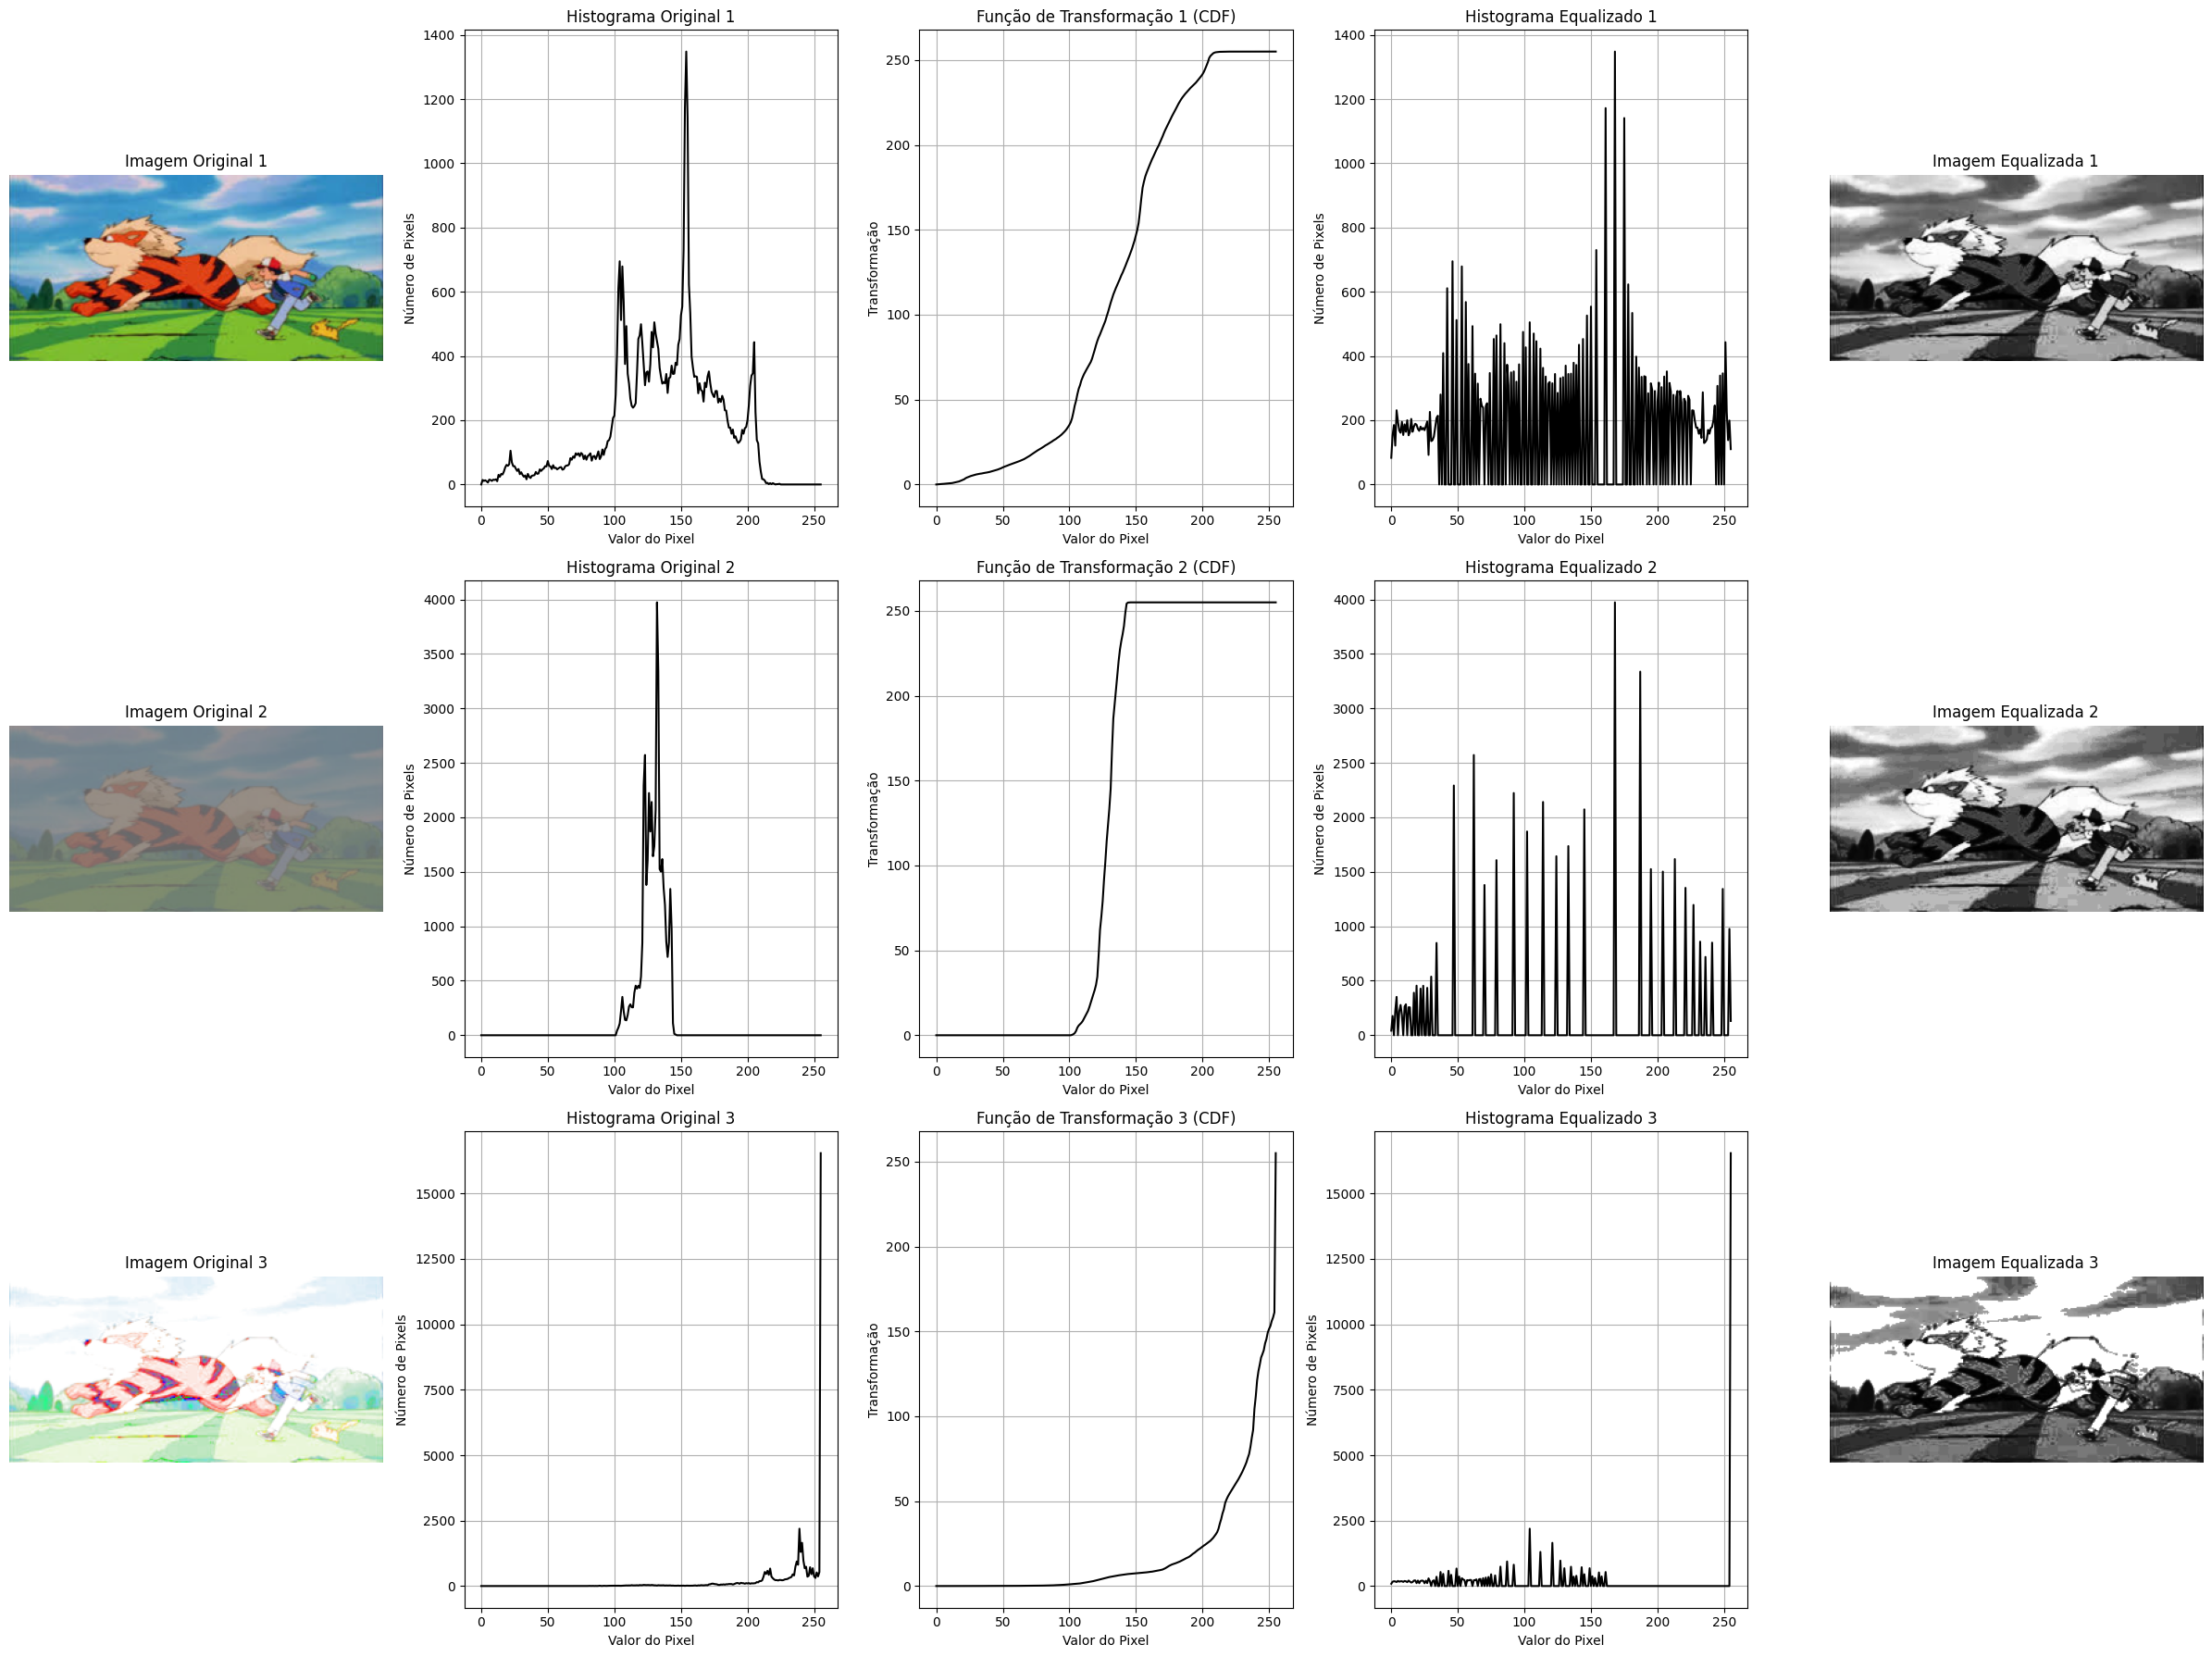

In [8]:

# Processar as três imagens
images_data = []
images_data.append(process_image(img1))
images_data.append(process_image(img2))
images_data.append(process_image(img3))

# Plotar e salvar a figura combinada
plot_combined(images_data)

output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.savefig(os.path.join(output_dir, 'ex7_combined_info.png'))


Vemos que independente do brilho e contraste da imagem, após a equalização, ela encontra um equilíbrio.